<a href="https://colab.research.google.com/github/NaveenKotyal/Handwritten-Digit-Classification-using-ANN/blob/main/Handwritten_Digit_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

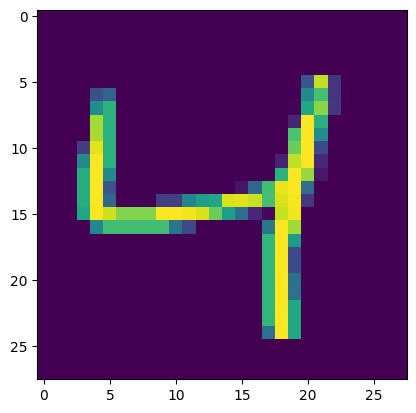

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2865 - accuracy: 0.9177 - val_loss: 0.1419 - val_accuracy: 0.9592
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1188 - accuracy: 0.9645 - val_loss: 0.1074 - val_accuracy: 0.9676
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.0918 - val_accuracy: 0.9718
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0927 - val_accuracy: 0.9715
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0961 - val_accuracy: 0.9725
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0388 - accuracy: 0.9882 - val_loss: 0.0915 - val_accuracy: 0.9731
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0943 - val_accuracy:

In [ ]:
y_log=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_log

array([[9.69938586e-18, 2.24150817e-13, 1.47897857e-11, ...,
        9.99999940e-01, 3.14004736e-14, 3.15348956e-08],
       [9.20199865e-16, 7.25116689e-16, 9.99999940e-01, ...,
        1.31666441e-28, 6.32695345e-21, 4.22564505e-33],
       [1.58012085e-13, 9.99999940e-01, 1.00080152e-11, ...,
        1.90386440e-09, 9.79668968e-09, 4.33295537e-14],
       ...,
       [3.17430907e-23, 2.03437882e-21, 5.15022325e-26, ...,
        2.36191813e-15, 6.79574244e-18, 2.12771814e-12],
       [3.81041369e-23, 2.17135443e-25, 5.24192631e-29, ...,
        4.76350484e-26, 7.50354911e-13, 3.39788662e-27],
       [6.82776928e-14, 8.03235087e-22, 3.74609958e-18, ...,
        1.00524946e-26, 3.05830572e-18, 1.30112427e-16]], dtype=float32)

In [ ]:
y_pred=y_log.argmax(axis=1)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9755

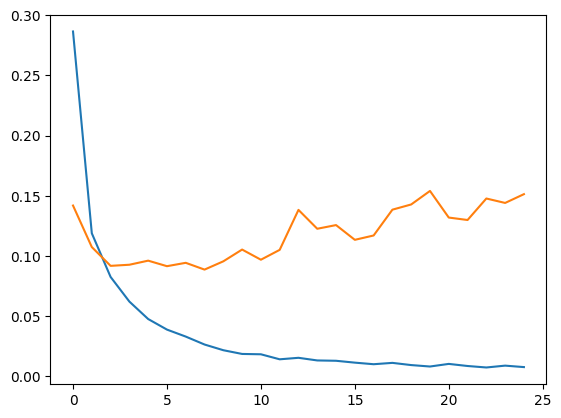

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

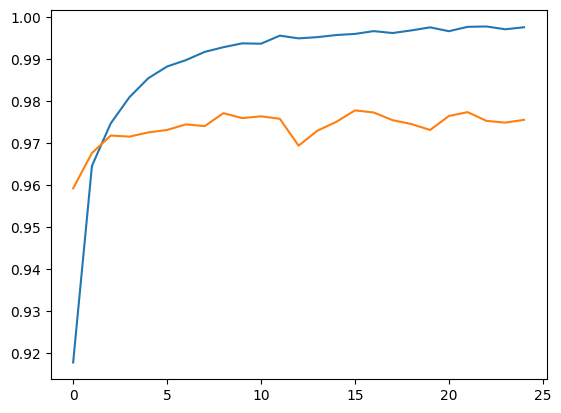

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

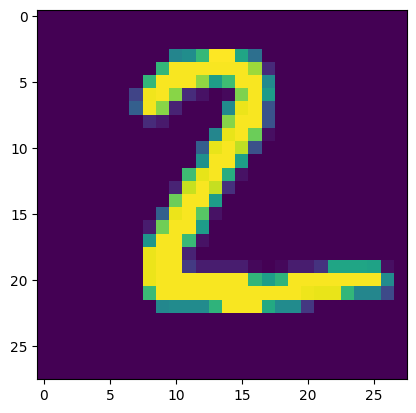

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([2])